In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -t monokai
import matplotlib.pyplot as plt
%matplotlib inline

# TensorFlow Core Tutorial

## 1. Fundamentals of TensorFlow

### 1.1) Tensors - The Standard Datastructure
Tensorflow is a python library. <br>
In TensorFlow Data is represented in form of Tensors, whereas Tensors are multidimensional arrays.
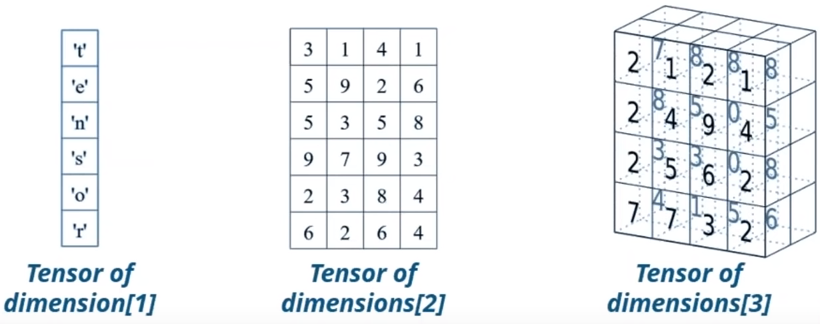 <br>
In TF Tensors are described with their Rank
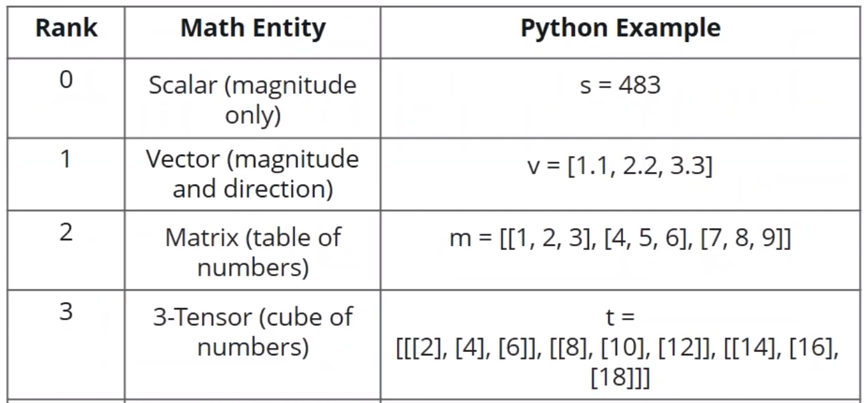 <br>
<p style='text-align: justify;'>So if you want ,for example, store your age in a tensor you could to this in a rank 0 Tensor.<br>
If you want to store your zip-code as well you can do this in a rank 1 Tensor.<br>
If you have a dataset of your familiy members ages, zip-codes, city-names, distances to you, etc, you can store this information in a rank 2 Tensor with every row representing one famiily member e.g. your dad and ever colum representig a feature you think is important (in our case: age, zip-code, ...)
<br>
In addition to the dimensionality (rank) the Tensors can have a specific datatye (e.g. float32).
If you dont assign a datatype, TensorFlow will do this for you. But bare in mind, if you want to optimize storage you might explicitly code the datatype for every Tensor.
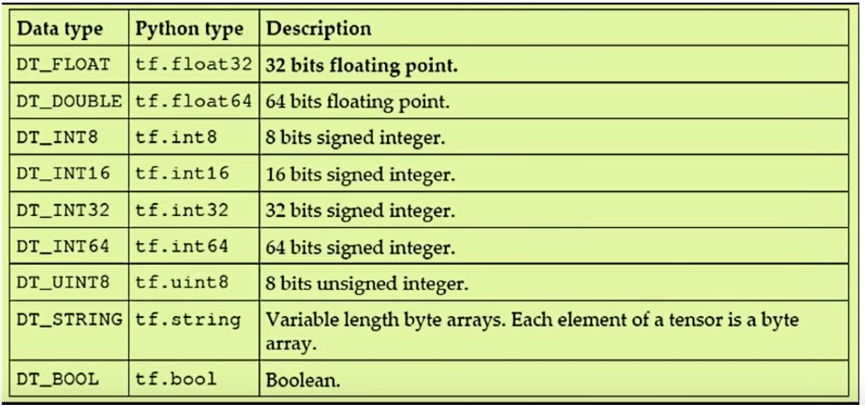
</p>



### 1.2) How does TensorFlow Works?
<p style='text-align: justify;'>
Tensorflow is an python library to easily build and train artificial neural networks (ANN) - the core of any modern A.I.<br>
    
In order to do so, the approach to coding an ANN is divided into two steps:<br>
    
    1. Buliding the Architecture (in TF this is called the computational graph)
    2. Executing the computational graph by running it within an session

So, in TensorFlow any computation (addition, mulitplication, deduction, division, etc.) are approached as an computational graph.
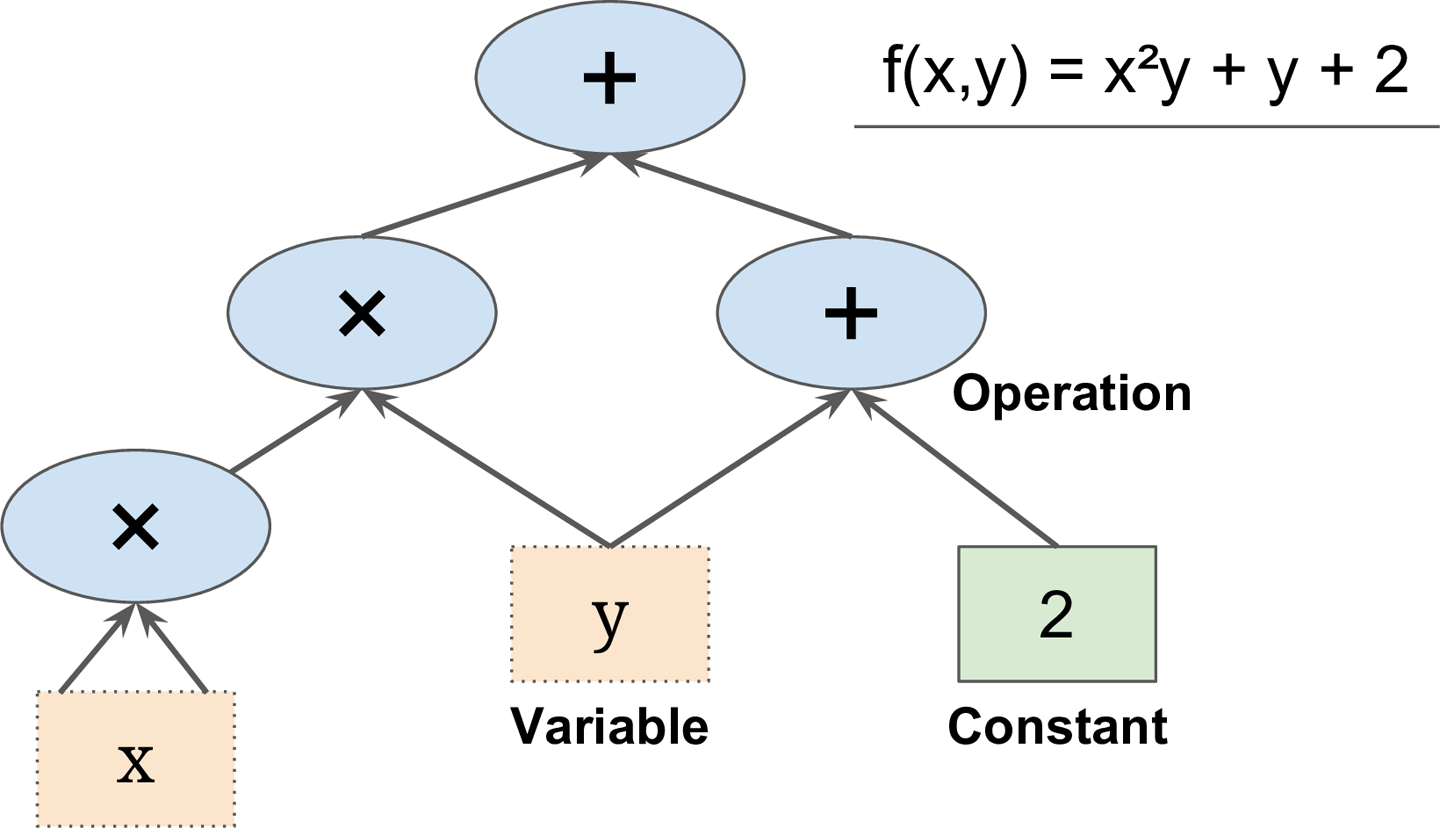 <br>
the constants and variables are all Tensors. The constant for example, is a Tensor of the rank 0, since it is a constant scalar and not a vector. <br>
In conclusion, you can now understand how the name TensorFlow was found. Essentially you are defining Tensors and let them "flow" alongside an previous architectured computational graph.<br>
Once it reached the end, the computation is done and the result is calculated - That's it! all the magic.

It is important to understand that your model (e.g. a simple linear function) becomes your computational graph. At this stage your model is just "described" - to turn it into reality, we need to run it inside a session ("start the flow").

</p>


### 1.3) TensorFlow Code Basics
<p style='text-align: justify;'>
    As descibed above, we first must constuct our computational graph (aka Model) and then run it inside a session. 
    
    
   So, the first part of your coding should be to construct the graph. 
   If you execute this "constructional" code, your compiler will output just an abstract description of your computational graph and not a mathmatical result. <br>
  
  To better understand this, let me demonstrate the constuction of simple multiplication of two constants
</p>

In [1]:
# EXAMPLE 1)
# Scope: Buildng a computational graph which multiplies two constants

# Neccessary Imorts:
import tensorflow as tf

# Defining the Nodes
node1 = tf.constant( 5.0, tf.float32 )
node2 = tf.constant( 6.0, tf.float32 )

product = node1 * node2

### If we print the product and the nodes with a pirnt-statement
### se what happens
print(node1, node2, product)



Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32) Tensor("mul:0", shape=(), dtype=float32)


<p style='text-align: justify;'>
We can clearly see, that the output is not 30. Instead, we get 3 Tensors. <br>
Every Tensor describes the respective node in an abstract way. The constants and the operation are getting identifiers (unique names).
</p>

In [2]:
# CONT EXAMPLE 1

# if we want to get the result we must first initialize a tensorflow session like this:
sess = tf.Session()
# Now that we created a Session, we have to tell the Session what we want to evaluate by doing the following:
output = sess.run(product)
# Now we want to see the output
print(output)
# And finally we must close the session to free it up.
sess.close()

### For Python Experts:
### As you might see, the open and closing can be handled in a python with statement like this:
### with tf.Session() as sess:
    ### output = sess.run(product)
### print(output)

30.0


<p style='text-align: justify;'>
So, to conclude: We first defined our nodes (Data stroed as a rank 0 Tensor), then we connected them by introducing another node (as a multiplication operation).<br>

Then we initalized a TensorFlow Session and told the session which computaional graph should be runned.
We printed the computational result and closed the session.
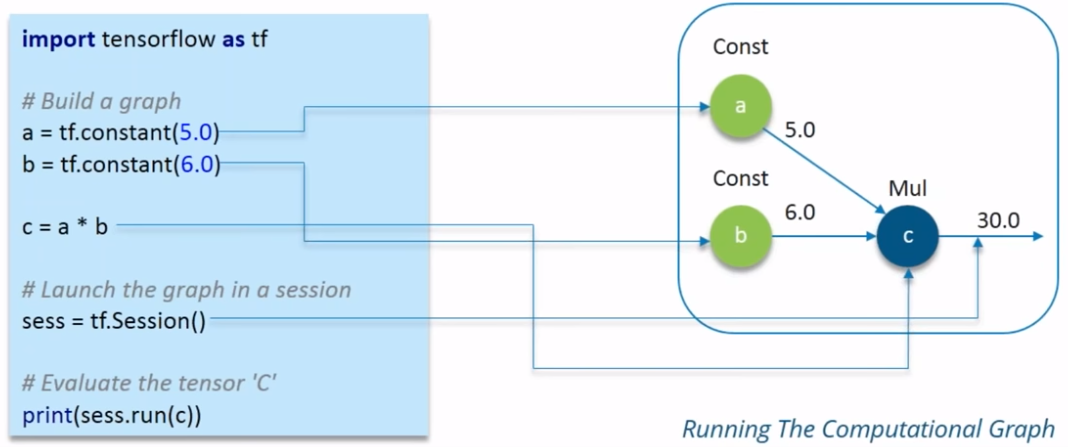

</p>


### 1.4) Graph Visualization 
<p style='text-align: justify;'>
You can imagine that it would be useful to visualize the "mess" you architectured in order to keep the overview :). <br>
Therefore, we can let TF do it with the help of the so-called TensorBoard. <br>
TensorBoard is Web-Application which is build to "understand" your graph. It comes in handy, that it also visulaizes it in a very comprehensive way.<br>
    
In order to make this happen we have to do the follwoing:


let me demonstrate it in Example 2
    
</p>

In [4]:
### EXAMPLE 2: Graph Viz
### Scope: Visualize the our multiplicaiton graph and display it in TensorBoard.

# First we need to render a file of our graph, which can then act as the input for TensorBoard.
# Therefore we write a file, using the FileWriter of TensorFlow.

File_Writer = tf.summary.FileWriter('example_2_1_graph_viz', sess.graph)

# by executing this code-snipped we are creating a new folder "example_2_graph_viz" in our directory.
# Inside this folder we find a file which can be read by TensorFlow

Here is how it looks like in my explorer:



Next we need to run the following command and point to the location where our graph is stored. <br>
`tensorboard --logdir = "path to your graph"`
<br>

Once we did this, open a new tab on your browser (remember TensorBoard is Web-App) and navigate to the following port:
<br>
`localhost:6006`

This how it looks in my browser:


### 1.5) Type of Nodes: Placeholders, Constants and Variables

<p style='text-align: justify;'>
    CONSTANT<br>
    a constant is a type of node, that takes no inputs and outputs one value it stores internally.<br>
    
    <br>
    But what if your graph should also deal with external input (e.g. from an dataset)?.<br>
    In this case we need placeholders.<br>
    <br>
    PLACEHOLDER<br>
    A placeholder is a promise to provide the "real" data later.<br>
    With the power of placeholders you can parameterize your graph, since you can code the logic with the parameters (placehodlder) and later when you want to execute "run" the graph you assign the parameters real values. 
    <br>
    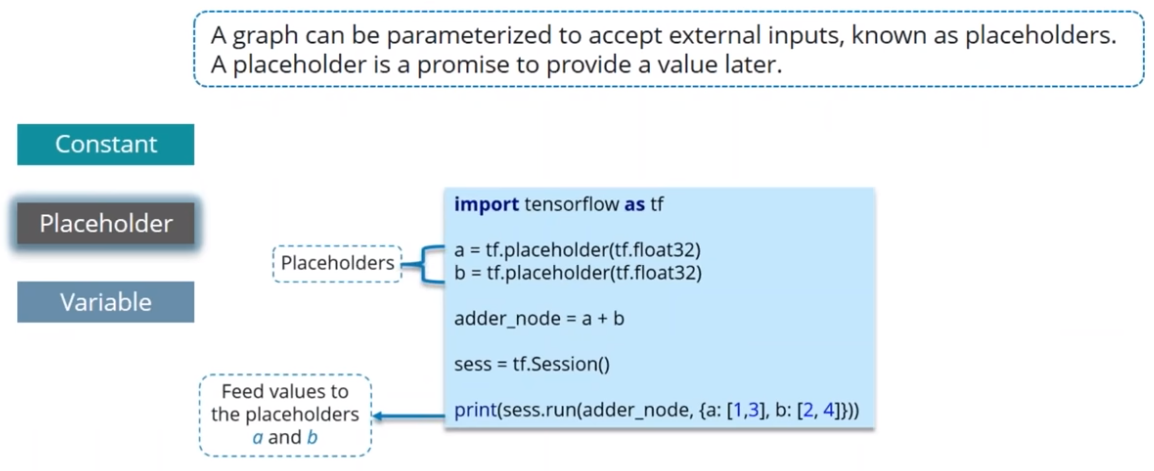
    <br> 
    let us understand the concept better by running the example no. 3
</p>


In [11]:
### EXAMPLE 3: TensorFlow Placeholder
### Scope: Define two placeholder-nodes and an adder-node. When running the graph, proive the real values

# First we need to create the two nodes 
ph_node1 = tf.placeholder(tf.float32)
ph_node2 = tf.placeholder(tf.float32)

# then we add the adder-node
adder_node = ph_node1 + ph_node2

# now we create a session to run the graph
with tf.Session() as sess:
    # remeber we now have to give the graph the real values
    # We do this by providing a phython dictionary with the node-names as tags and the values as values
    ex3_output = sess.run(adder_node, {ph_node1: [1,3], 
                                       ph_node2: [2,4]})
    # what we did is to flush-in a rank 1 Tensor (Vector) for the placeholder node 1 
    # and another rank 1 Tensor for the placeholder node 2.
    # both Tensors are flowing to the adder_node, where both are summed-up.
print('result: ', ex3_output)

result:  [3. 7.]


<p style='text-align: justify;'>
    VARIABLE<br>
    But how can we modify the graph if we want to have the same input but different outputs?<br>
    Let's say we have a datasource which is feeding in the input but we want to get a handle on the calculation inside the graph so that we can slightly adjust the output it produces.<br>
    In this case we need variables.
    <br>
    In other words:<br>
    In order to make our model (graph) trainable, we need to be able to modify our graph (model) to get new outputs with the same input. Variables allow us to add trainable parameters to our graph (model). 
    <br>
    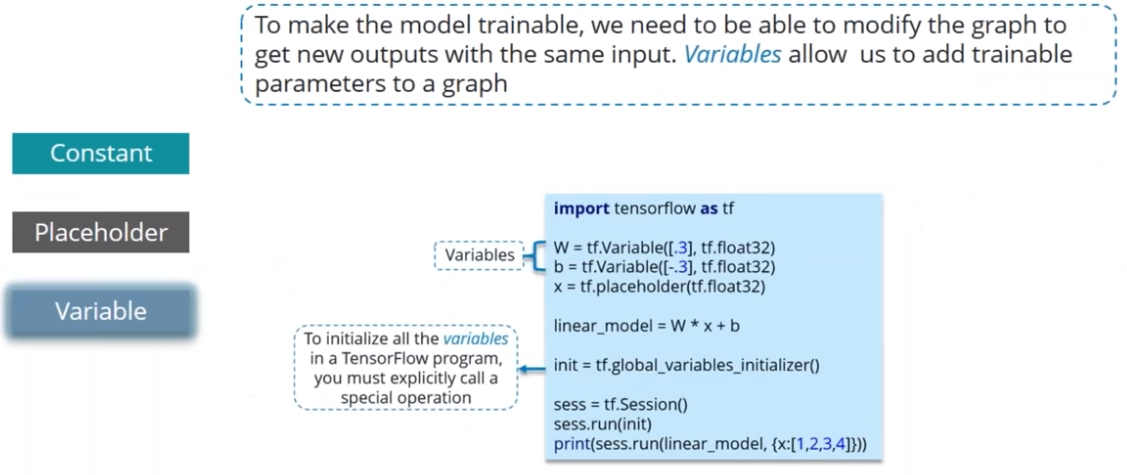
    <br>
    The key-difference bewtween Variables and the other node-types, is that variables must be expicitly initialized in the code.
    <br>
    Let me demonstrate this in our  fourth example:
</p>

In [13]:
### EXAMPLE 4: TensorFlow Variables
### Scope: create a linear model with 2 variables.

# Math Recap: a linear function as the general form of: f(x) = m*x +b
# whereas m is the slope and b is the point where the line intersects the y-axis.
# If we want to fit a linear line inside a data-cloud, we must adjust (train) our model 
# so that it chooses the best-fit values for m and b

# Machine Learning Terminology:
# In ML, more specific in ANN, the slope of an linear model is represented by an network weight
# The intersection-point is called the bias.

# First we create our variable-nodes and give them a initial value
weight = tf.Variable([0.3], tf.float32)
bias = tf.Variable([0.3],tf.float32)

# Then we create our Placeholder-Node for our input x
input_x = tf.placeholder(tf.float32)

# now we create the links in order to represent our model
linear_model = weight * input_x + bias

# Before we can run our model inside a session we MUST INITIALIZE the varible nodes.
init = tf.global_variables_initializer()

# In order to execute the initilization we must run the initializer before we can run our model
with tf.Session() as sess:
    sess.run(init)
    # the variable-nodes are now initalized
    # remember to provide the promised "real" values for you placeholder-node
    ex4_output = sess.run(linear_model, {input_x: [1,2,3,4]})
# now we want to print our output
print('result:', ex4_output)

result: [0.6        0.90000004 1.2        1.5       ]


<p style='text-align: justify;'>
  let's say we used this model to predict some values. Now that we see the results, we are not very happy with the prediction.<br>
    The Question is: How can we now change the output by keeping the graph-architecture and the input the same? <br>
    You are right! We must change the bias or the weight (in other words: the model must adjust its varible-nodes)
</p>

### 1.6) How to make our  Model learn? 
<p style='text-align: justify;'>
  As we figured out in the previous seciton, our model should adjust its variable-nodes in order to make better predictions.<br>
    But how can we esablish this behaviour?<br>
    Simply Spoken: We need to know what the correct output for every given input is (supervised-learning). The correct output or result is called lable.<br>
    The Idea is now to initialize the varibles randomly and let the model make a prediction. 
    We then calculate how far our prediction was wrong, or in other words we are calculating the error. <br>
    once we know the error, we use it to adjust the weights and biases in such a way that we minimize the error-function.
    <br> 
    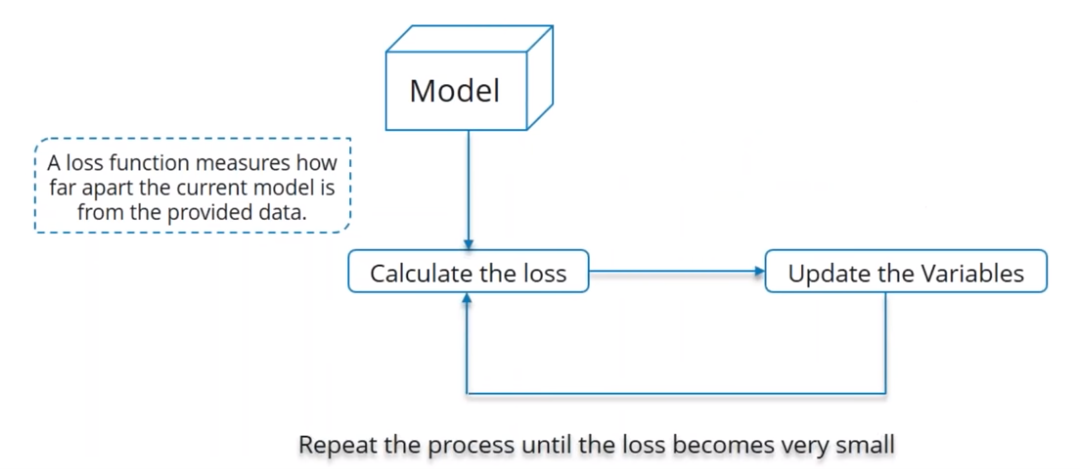
</p>

#### 1.7) How to Calculate the Error 
<p style='text-align: justify;'>
Before we can start to calclulate an error we need the correct value from our dataset.<br>
In our code, we are promising this value with a placeholder-node called y.
<br>
Since linear regression is not new to humanity, a state-of-the-art way to calculate the loss/error is by calculating the squared-error. 
<br>
Let me demonstrate this in example 5
</p>

In [24]:
### EXAMPLE 5: Calculation of the squared error
### Scope: calculating the error and print it

# Model Parameters
weight = tf.Variable([0.3], tf.float32)
bias = tf.Variable([0.3],tf.float32)

# Inputs, Linking and Output
input_x = tf.placeholder(tf.float32)
linear_model = weight * input_x + bias
y = tf.placeholder(tf.float32)

# Error calculation
squared_deltas = tf.square(linear_model - y)
error = tf.reduce_sum(squared_deltas)

# INITIALIZE the varible nodes.
init = tf.global_variables_initializer()

# Run the Model
with tf.Session() as sess:
    sess.run(init)
    error_output = sess.run(error, {input_x: [1, 2, 3, 4],
                                    y: [0 , -1, -2, -3]})
print (error_output)

# Notice that our desired values are in the same shape as the input tensor.
# That means the correct value for the input of 1 is 0 (e.g. we measured this beahviour in reality)

34.46


#### 1.8) Optimizer - Let the model do the Job
An optimizer will check the magnitute of the derivation of the loss-funciton.<br>
In other words: An optimizer will check the change in loss with respect to the change of the variables.
and if the loss is decreasing the optimizer will keep updating the variables in this direction. <br>

The state-of-the-art optimizer for such a task is called Gradient Descent.
<br>
Here is how it works:<br>
Fist let us understand the principle with a thought experiment:
Consider you are on the peak of a mountain and blind folded, how do you find the way to the valley?
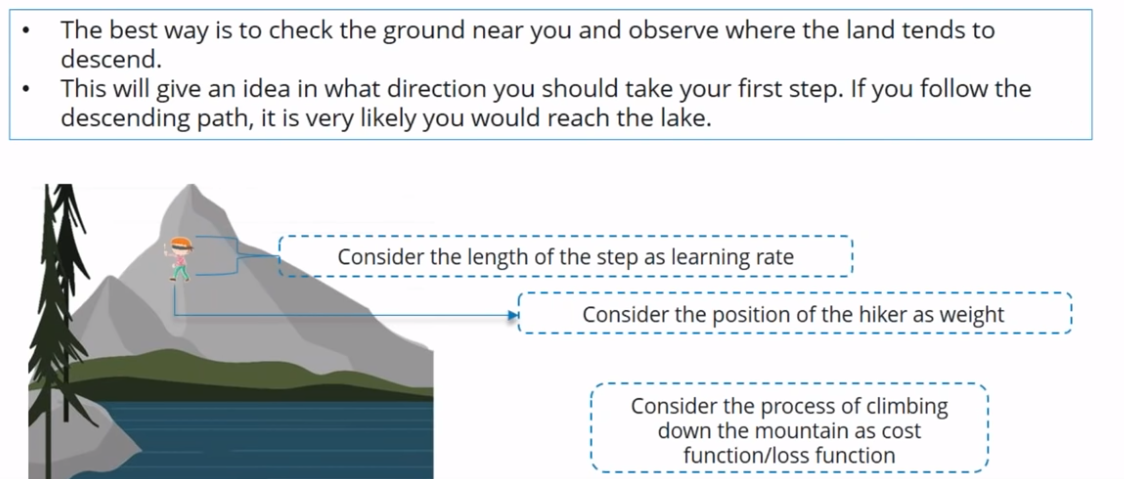
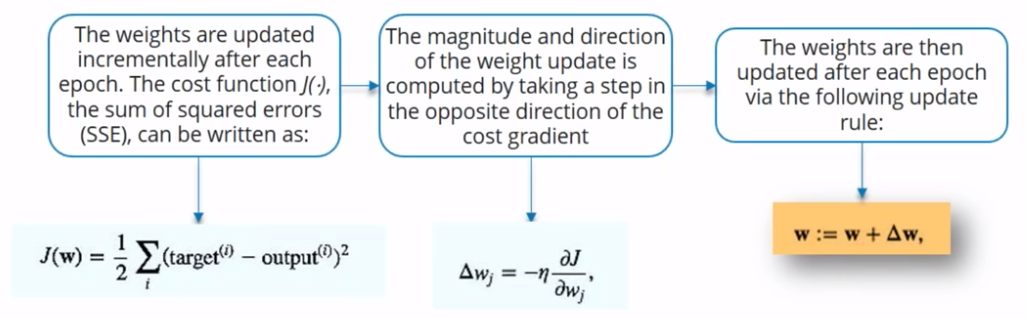
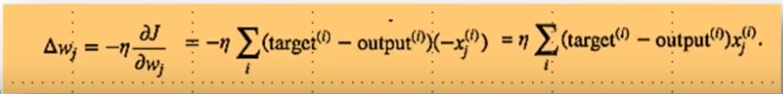



#### 1.9) Implementation of the Optimizer
In this section we will learn how to implement the GDC optimizer. <br>
Again this is not new to humanity, so we can grab the optimizer from TF library <br>

Here is how it looks like:

In [32]:
### EXAMPLE 5: Implementation of the GDC Optimizer
### Scope: use the GDC optimizer to update our weights in oder to minize the loss

# fist we start with creating an optimizer object
# Notice that the GDC-Optimizer takes the learning rate as an input.
optimizer = tf.train.GradientDescentOptimizer(0.01)

# now we want to tell our optimizer what to optimize and in which direction
train = optimizer.minimize(error)

# then we must initialize the variables
with tf.Session() as sess:
    sess.run(init)
    # now we iterate 1000 times to let the model slightly adjust its weights
    # the iteration is called epoch
    for i in range(1000):
        sess.run(train, {input_x: [1,2,3,4], 
                                y: [0, -1, -2, -3]})
        
    # now we want to know which value the bias and weight got
    print(sess.run([weight, bias]))

[array([-0.9999979], dtype=float32), array([0.9999939], dtype=float32)]


In [35]:
W = tf.random_uniform([16, 4], 0, 0.01)
sess = tf.Session()
out = sess.run(W)
print(out)
sess.close()

[[5.1150308e-03 3.7548493e-03 4.9661039e-03 2.9517042e-03]
 [2.2861266e-03 9.1991015e-03 8.1696082e-03 9.0587400e-03]
 [4.2360281e-03 7.6311682e-03 4.6542524e-03 6.1510978e-03]
 [5.4870604e-04 5.4646945e-03 4.8733712e-03 5.3909537e-04]
 [8.8213729e-03 5.9392950e-03 8.9681167e-03 3.7088394e-05]
 [8.3123799e-03 1.8210518e-03 5.7189497e-03 4.0467796e-03]
 [2.0672129e-03 1.0286450e-04 1.8907153e-03 2.2875666e-04]
 [4.9378262e-03 2.8721152e-03 5.8741365e-03 7.3552034e-03]
 [1.6114198e-03 9.5053669e-03 7.9966290e-03 7.2017657e-03]
 [5.2905381e-03 2.6585017e-03 1.7143285e-03 3.8923442e-03]
 [2.6914084e-03 1.1124134e-03 7.7202176e-03 1.2601387e-03]
 [1.6199171e-03 3.4744965e-03 7.6644742e-03 9.3895253e-03]
 [7.9994975e-03 5.2042720e-03 4.7580958e-03 8.6086094e-03]
 [7.4095819e-03 6.6020545e-03 4.4415570e-03 3.4467792e-03]
 [6.7253602e-03 7.2643468e-03 8.8412613e-03 6.5240618e-03]
 [7.4638734e-03 4.4237482e-03 1.2692928e-03 3.0199026e-03]]
